# Spectral analysis
- Load data
- Preprocess (if necessary using preprocess_folder.py from process_nwb)
    - Resample down to 3200Hz
    - Notch line noise and harmonics
    - Reference CAR
    - Compute wavelet transform
    - Resample down to 400Hz
- Plot spectrogram for one channel

## User defined parameters

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pynwb import NWBHDF5IO
from laminar_uecog_viz import spectral

In [2]:
# Plotting parameters
mpl.rcParams['figure.facecolor'] = '1'

In [3]:
data_path = '/home/jhermiz/data/aer/RVG16/RVG16_B01/RVG16_B01.nwb' #path to nwb file
io = NWBHDF5IO(data_path, 'r')
nwb = io.read()

In [4]:
nwb

root pynwb.file.NWBFile at 0x140250476673824
Fields:
  acquisition: {
    ECoG <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    ECoG <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    ECoG <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: This is an acute rat experiment. Auditory stimuli are played to an anesthsized rat and electrophysiological measurements are made auditory cortex
  experimenter: ['Vanessa Gutierrez']
  file_create_date: [datetime.datetime(2021, 9, 1, 10, 35, 51, 37836, tzinfo=tzoffset(None, -25200))]
  identifier: 0d045d16-0b4b-11ec-96d0-ac1f6b76b038
  institution: Lawrence Berkeley National Lab
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Bouchard Lab
  notes: All channels responded except obvious bad channels, some responses were not as spike, maybe due to slight damage to brain
  pharmacology: Anesthesized with Ketamine (90 mg/kg i

## Preprocessed data
**If there is no preprocessed data run preprocess_folder.py as shown below**

In [5]:
#!python path/to/process_nwb/scripts/preprocess_folder.py path/to/nwb/folder --all_filters

In [6]:
nwb.processing['preprocessing']

preprocessing pynwb.base.ProcessingModule at 0x140250476085792
Fields:
  data_interfaces: {
    CAR <class 'pynwb.ecephys.ElectricalSeries'>,
    CAR_ln_downsampled_ECoG <class 'pynwb.ecephys.ElectricalSeries'>,
    downsampled_ECoG <class 'pynwb.ecephys.ElectricalSeries'>,
    wvlt_amp_CAR_ln_downsampled_ECoG <class 'pynwb.misc.DecompositionSeries'>
  }
  description: Preprocessing.

In [7]:
# load wavelet data
wavelet_di = nwb.processing['preprocessing'].get_data_interface('wvlt_amp_CAR_ln_downsampled_ECoG')
Wall = wavelet_di.data
f = wavelet_di.bands.band_mean.data
fs_final = wavelet_di.rate

In [8]:
wavelet_di.fields

{'resolution': -1.0,
 'comments': 'no comments',
 'description': 'Wavlet: CAR_lned: Downsampled: This is an acute rat experiment. Auditory stimuli are played to an anesthsized rat and electrophysiological measurements are made auditory cortex. Recordings from ECoG sampled at 12207.031250 Hz. Then resampled down to 12000 Hz',
 'conversion': 1.0,
 'unit': 'no unit',
 'data': <HDF5 dataset "data": shape (31139, 128, 54), type "<f4">,
 'rate': 400.0,
 'starting_time': 0.0,
 'starting_time_unit': 'seconds',
 'source_timeseries': CAR_ln_downsampled_ECoG pynwb.ecephys.ElectricalSeries at 0x140250476086032
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (249109, 128), type "<f4">
   description: CAR_lned: Downsampled: This is an acute rat experiment. Auditory stimuli are played to an anesthsized rat and electrophysiological measurements are made auditory cortex. Recordings from ECoG sampled at 12207.031250 Hz. Then resampled down to 12000 Hz
   electro

## Plot spectrogram for a 0.5 sec window

Text(0, 0.5, 'Frequency (Hz)')

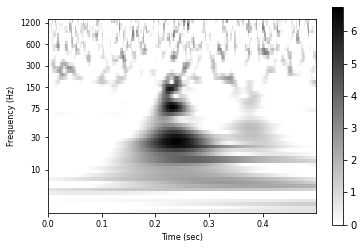

In [9]:
W = Wall[:, 0, :]
tbeg = int(fs_final*14.35)
tend = tbeg + int(fs_final*0.5)
Wsnip = W[tbeg:tend, :]
mean = np.mean(W, axis=0)
sigma = np.std(W, axis=0)
Wsnip_norm = (Wsnip - mean)/sigma
t = np.arange(0, tend-tbeg)/fs_final
fig, ax = spectral.plot_spectrogram(Wsnip_norm, np.array(f), t, colorbar=True)
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Frequency (Hz)')